## 유통 매장 판매량 예측을 통한 재고 최적화

1. 문제 정의 
배경: 유통 산업에서 부정확한 수요 예측은 과재고로 인한 비용 증가와 결품으로 인한 매출 손실이라는 직접적인 문제로 이어집니다. 데이터 기반의 정확한 판매량 예측은 효율적인 재고 관리와 비즈니스 수익성 개선의 핵심입니다.

프로젝트 목표: 에콰도르 대형 유통 매장의 과거 판매 데이터를 활용하여, 각 매장별-상품군별 일일 판매량을 예측하는 시계열 모델을 개발합니다.

기대 효과: 개발된 예측 모델을 통해 발주 자동화 및 재고 최적화 시스템의 기반을 마련하고, 마케팅 프로모션의 효과를 정량적으로 분석하여 데이터 기반 의사결정을 지원합니다.

2. 핵심요약
    - 프로젝트 목표: 유통 매장의 일별 판매량 데이터를 분석하여, 재고 비용을 최소화하고 매출 기회를 극대화하기 위한 시계열 예측 모델을 개발을 목표로 합니다.
    - 핵심결과: 여러가지 피처엔지니어링과 하이퍼파라미터 튜닝을 통해 5-Fold 시계열 교차검증 기준 평균 MAE (평균 절대 오차) 58.15를 달성했습니다. 이는 초기 베이스라인 모델 대비 예측 오차를 약 17.5% 개선한 수치입니다.
    - 기대 효과: 향상된 예측 정확도를 통해 불필요한 재고 비용을 절감하고, 결품으로 인한 기회손실을 줄여 비즈니스 수익성을 개선할 수 있습니다.
    - 주요 기술 스택: Python, Pandas, LightGBM, Optuna, SHAP

3. 최종 성과 및 비즈니스 가치
본 프로젝트의 목표는 단순히 낮은 오차(Error)를 기록하는 모델을 만드는 것이 아니라, 예측 모델을 통해 실질적인 비즈니스 문제인 '재고 관리'를 개선하는 것이었습니다. 최종 모델의 성능 지표이며 가장 직관적인 지표인 MAE 58.15는 다음과 같은 비즈니스 가치를 가집니다.
    - 의미: 우리 모델은 특정 상점의 한 상품군에 대한 하루 판매량을 예측할 때, 평균적으로 약 58개의 오차를 보입니다.
    - 가치1: 재고 비용 절감, 예측 오차를 줄임으로써, 과도하게 쌓아두어야 했던 안전 재고의 양을 줄일 수 있습니다. 이는 창고 보관 비용 및 재고 폐기 비용의 직접적인 절감으로 이어집니다.
    - 가치2: 기회손실 방지, 더 정확한 예측은 결품 발생 확률을 낮춥니다. 이는 고객이 원하는 상품이 없어 구매하지 못하는 상황을 막아, 놓칠 수 있었던 매출을 확보하는 효과를 가집니다.

4. 프로젝트를 하면서 어려웠던 점 및 해결 과정
프로젝트 초기에는 단순히 높은 점수를 내기 위해 수많은 피처 엔지니어링과 모델링을 시도했지만, 후에는 점수에 대한 욕심을 버리고 점차적으로 '왜 성능이 개선되는가'를 해석하고 '안정적인 성능을 확보하는 것'에 초점을 맞추는 방향으로 접근 방식을 전환했습니다. 이 과정에서 마주친 주요 난관과 해결 전략은 아래와 같습니다.
(1) 데이터 누수
    - 어려웠던 점: 초기 모델링에서 비정상적으로 높은 성능이 나왔으나, 이는 shift()를 사용하지 않은 통계 피처 생성으로 인해 미래 정보가 예측에 사용되었기 때문임을 발견했습니다.
    - 해결 과정: 모든 시계열 피처 생성 시 shift(1)을 적용하여 데이터 누수를 원천적으로 차단하고, TimeSeriesSplit을 이용한 교차검증으로 모델의 일반화 성능을 신뢰도 높게 측정했습니다.
(2) 수 많은 파생변수 생성
    - 어려웠던 점: DTW 기반 파생변수, expanding, EWM, pct_change 등 수많은 파생변수를 생성하다 보니, 어떤 변수가 정말 성능 향상에 기여하는지 파악하기 어려웠습니다.
    - 해결 과정: 기존에 결측값처리-피처엔지니어링-피처 셀렉션-모델링 순서대로 이루어졌던 과정을 완전히 뜯어 고치고, 하나의 함수에서 파생변수들을 생성하면 그 해당 변수들이 얼마나 많은 모델 점수 향상에 기여를 했는지 확인하기 위해 하나의 파생변수 함수-모델링-SHAP검정을 계속 반복하여 모델링 코드와 SHAP 검정 코드들이 많이 겹치는 단점이 있지만 해당 구조로 파생변수의 유효성에 대해 더 해석을 쉽게 할 수 있는 틀을 마련하였습니다. 또한 기존의 DTW와 EWM, expanding 관련 파생변수들은 과감히 제외하고 강력한 파생변수들만 남겨 실험을 진행하였습니다.
(3) 여러 가지 모델링과 실패
    - 어려웠던 점: 파생변수의 분포가 매우 불균형하게 분포하고 있어서 이를 위해 다양한 방법의 모델링 two-stage회귀, quintile 회귀 등 여러 모델링을 시도해 보았으나, 별로 유의미한 결과를 도출해 내지 못했습니다.
    - 해결 과정: 파생변수의 분포가 매우 불균형한 것은 맞으나 light-skew의 형태를 띄고 있어 순정 모델링과 타겟 변수를 로그변환을 하여 모델링을 진행하였고 그 결과, 저판매량 상품 예측에 더 중요한 지표인 RMSLE가 0.4140에서 0.3783으로 크게 개선되는 효과를 확인했습니다.
(4) 파생변수의 옵션값 설정
    - 어려웠던 점: 파생변수의 옵션값(window size 등)을 설정할 때, 모든 가능성을 실험해야 한다는 강박으로 초기 방향 설정에 어려움을 겪었습니다.
    - 해결방법: 모든 경우의 수를 시도하기보다, 문제 정의와 데이터 특성(단기/장기, 미시/거시)에 기반하여 가설을 세우고, 그에 맞는 굵직하고 유의미한 옵션값들을 우선적으로 실험하여 효율적인 분석을 진행했습니다.

5. 향후 개선 방향
    - 외부 데이터 추가: 날씨, 지역 이벤트, 경쟁사 프로모션 등 추가적인 외부 데이터를 활용하여 예측 성능을 고도화할 수 있습니다.
    - 모델 다양화: LightGBM 외에 Prophet, N-BEATS 등 다른 시계열 특화 모델과의 성능을 비교하여 앙상블 모델을 구축하는 것을 고려해볼 수 있습니다.

6. 개발 환경 및 실행 방법 (Environment & How to Run)
Environment:
    - Python 3.13.2

    - Docker

    - Visual Studio Code (Remote - Containers)


In [ ]:
# 기본 라이브러리 호출 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# 데이터 불러오기 

train = pd.read_csv(r"C:\Users\shoot\Downloads\store-sales-time-series-forecasting\train.csv")
test = pd.read_csv(r"C:\Users\shoot\Downloads\store-sales-time-series-forecasting\test.csv")
transactions = pd.read_csv(r"C:\Users\shoot\Downloads\store-sales-time-series-forecasting\transactions.csv")
holidays_events = pd.read_csv(r"C:\Users\shoot\Downloads\store-sales-time-series-forecasting\holidays_events.csv") 
oil = pd.read_csv(r"C:\Users\shoot\Downloads\store-sales-time-series-forecasting\oil.csv")
stores = pd.read_csv(r"C:\Users\shoot\Downloads\store-sales-time-series-forecasting\stores.csv")

In [ ]:
# 데이터 병합하기

train['date'] = pd.to_datetime(train['date'])
transactions['date'] = pd.to_datetime(transactions['date'])
oil['date'] = pd.to_datetime(oil['date'])
holidays_events['date'] = pd.to_datetime(holidays_events['date'])

df = train.copy()
df = df.merge(transactions, 
              on=['date', 'store_nbr'],
              how='left')

df = df.merge(oil,
              on='date',
              how='left')

holidays_clean = holidays_events.drop_duplicates(subset=['date'], keep='first')

df = df.merge(holidays_clean,
              on=['date'],
              how='left')

stores = stores.rename(columns={'type': 'store_type'})


df = df.merge(stores,
              on='store_nbr',
              how='left')

In [ ]:
# 기존 변수 결측값 처리하기

df['transactions'] = df['transactions'].fillna(0)
df['dcoilwtico'] = df['dcoilwtico'].ffill().bfill()  
df['type'] = df['type'].fillna('None')
df['locale'] = df['locale'].fillna('None')
df['locale_name'] = df['locale_name'].fillna('None')
df['description'] = df['description'].fillna('None')
df['transferred'] = df['transferred'].fillna('None')

In [ ]:
# 문자형 컬럼 추출

objects = []

for i in df.columns:
    if df[i].dtype == object:
        objects.append(i)

In [ ]:
# 숫자형 컬럼 추출

numerics = []

for i in df.columns:
    if df[i].dtype == 'int64':
        numerics.append(i)

In [ ]:
# 레이블 인코딩 

from sklearn.preprocessing import LabelEncoder

label_cols = ['transferred', 'family', 'locale_name', 'description', 'city', 'state']
for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

In [ ]:
# 원 핫 인코딩

onehot_cols = [col for col in objects if col not in label_cols]
df = pd.get_dummies(df, columns=onehot_cols, dtype=int)

In [ ]:
df = df.drop(columns=[col for col in objects if col != 'family' and col in df.columns])

df['family'] = df['family'].astype(int)

### 종속 변수(Sales) 분포 확인
# 판매량(sales)의 분포를 히스토그램으로 확인합니다.
# 대부분의 값이 0에 몰려있는 것을 통해, RMSLE 평가지표의 중요성과 로그 변환의 필요성을 짐작할 수 있습니다.

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df['sales'], bins=100)
plt.title('Sales Distribution')
plt.show()

### 월별 판매량 합계 (계절성 패턴 확인)
# 월별 판매량 합계를 통해 1년 주기의 계절적 패턴을 확인합니다.

In [ ]:
monthly_sales = df.groupby(df['date'].dt.month)['sales'].sum()
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

### 3-3. 전체 기간에 걸친 일별 판매량 추세
# 전체 기간의 판매량 추이를 라인 그래프로 확인하여 장기적인 트렌드와 특정 이벤트의 영향을 파악합니다.

In [ ]:
daily_sales = df.groupby('date')['sales'].sum()
plt.figure(figsize=(18, 6))
daily_sales.plot()
plt.title('Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

In [ ]:
df['year_month'] = df['date'].dt.to_period('M').astype(str)

In [ ]:
df['year_month'] = df['date'].dt.to_period('M').astype(str)

# 1. 월(Month) 단위로 변환하여 기준점 설정 
# 중간 계산을 위해서 datetime의 to_period 메서드 사용
df['year_month'] = pd.to_datetime(df['year_month'])
start_month = df['year_month'].min()

# 2. 시작 월로부터 몇 개월이 지났는지 계산하여 time_idx 생성
df['time_idx'] = (df['year_month'].dt.year - start_month.year) * 12 + \
                 (df['year_month'].dt.month - start_month.month)

In [ ]:
# 연, 월, 일, 요일 등 기본적인 시간 정보를 피처로 추가

df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['dayofweek'] = df['date'].dt.dayofweek  # 월요일=0 ~ 일요일=6
df['dayofyear'] = df['date'].dt.dayofyear
df['weekofyear'] = df['date'].dt.isocalendar().week.astype(int)

# 생성된 피처 확인
print("시간 기반 피처 생성 후 df[['date', 'year', 'month', 'day', 'dayofweek']].head():")
print(df[['date', 'year', 'month', 'day', 'dayofweek']].head())

시간 기반 피처 생성 후 df[['date', 'year', 'month', 'day', 'dayofweek']].head():
        date  year  month  day  dayofweek
0 2013-01-01  2013      1    1          1
1 2013-01-01  2013      1    1          1
2 2013-01-01  2013      1    1          1
3 2013-01-01  2013      1    1          1
4 2013-01-01  2013      1    1          1


In [ ]:
# 먼저, 정확한 시차 계산을 위해 데이터를 정렬
df = df.sort_values(by=['store_nbr', 'family', 'date'], ascending=True)

# 약 1개월, 3개월, 1년 전 판매량 피처를 생성
lags = [28, 91, 364]
for lag in lags:
    feature_name = f'sales_lag_{lag}d'
    # 그룹별로 sales 컬럼을 lag 만큼 이동(shift)시켜 새로운 피처 생성
    # 개별 시계열의 보존을 위해 ['store_nbr', 'family'] 그룹화, 하나의 컬럼으로 그룹화를 했을 경우 누수의 가능성
    df[feature_name] = df.groupby(['store_nbr', 'family'])['sales'].shift(lag)

# Lag 피처 생성 후 생긴 결측치(NaN)는 0으로 채웁니다.
# (과거 데이터가 없는 초반 기간은 판매량이 0이었다고 가정)
lag_cols = [col for col in df.columns if 'sales_lag' in col]
df[lag_cols] = df[lag_cols].fillna(0)


# Lag 피처가 잘 생성되었는지 확인 (마지막 데이터에서 확인하는 것이 정확합니다)
print("\nLag 피처 생성 후 df.tail():") 
print(df[df['sales'] > 0][['date', 'store_nbr', 'family', 'sales'] + lag_cols].tail())


Lag 피처 생성 후 df.tail():
              date  store_nbr  family  sales  sales_lag_28d  sales_lag_91d  \
2990063 2017-08-09         54      32    4.0            1.0            2.0   
2991845 2017-08-10         54      32    2.0            0.0            6.0   
2995409 2017-08-12         54      32    1.0            2.0            4.0   
2997191 2017-08-13         54      32    2.0            5.0            9.0   
3000755 2017-08-15         54      32    3.0            6.0            4.0   

         sales_lag_364d  
2990063             1.0  
2991845             0.0  
2995409             4.0  
2997191             2.0  
3000755             5.0  


In [ ]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# ===================================================================================
# 3. 베이스라인 모델링 및 평가 (Baseline Modeling & Evaluation)
# ===================================================================================
# 목표: 기본적인 피처(시간, 시차)만으로 모델을 구축하여, 향후 추가될 고급 피처들의
#       성능 향상도를 측정할 객관적인 '기준점(Benchmark)'을 설정합니다.
# ===================================================================================


# --- 1. 시계열 데이터 분할 ---
# 시계열 데이터에서는 '과거의 데이터로 미래를 예측한다'는 원칙을 지켜야합니다.
# 따라서 데이터를 무작위로 섞지 않고, 특정 시점을 기준으로 훈련/검증 세트를 분리
# 이는 모델이 미래의 정보를 미리 학습하는 데이터 누수를 방지하기 위함
valid_start_date = '2017-07-01'
train_df = df[df['date'] < valid_start_date]
valid_df = df[df['date'] >= valid_start_date]

# 피처(X)와 타겟 변수(y) 분리
# id와 같이 모델링에 직접 사용하지 않을 컬럼들(id 또는 날짜 관련 컬럼 등)은 제외합니다.
features = [col for col in df.columns if col not in ['date', 'id', 'sales', 'year_month']]

X_train = train_df[features]
y_train = train_df['sales']
X_valid = valid_df[features]
y_valid = valid_df['sales']

print(f"훈련 데이터: {X_train.shape}, 검증 데이터: {X_valid.shape}")


# --- 2. LightGBM 모델 학습 ---
# 모델 파라미터 설정 (베이스라인용 기본 설정)
lgbm_params = {
    'objective': 'regression_l1',  # MAE를 손실 함수로 사용하여 이상치에 덜 민감하게 만듭니다.
    'metric': 'rmse',              # 평가 지표로는 RMSE를 사용합니다.
    'n_estimators': 1000,          # 부스팅 반복 횟수 (트리의 개수)
    'learning_rate': 0.05,         # 학습률
    'feature_fraction': 0.8,       # 각 트리마다 사용할 피처의 비율
    'bagging_fraction': 0.8,       # 데이터 샘플링 비율 (과적합 방지)
    'bagging_freq': 1,        
    'verbose': -1,                 # 학습 과정 로그 출력 안 함
    'n_jobs': -1,                  # 모든 CPU 코어 사용
    'seed': 42,                    # 결과 재현을 위한 시드 고정 
    'boosting_type': 'gbdt',
}

# 모델 생성 및 학습
model = lgb.LGBMRegressor(**lgbm_params)
model.fit(X_train, y_train,
          eval_set=[(X_valid, y_valid)],
          eval_metric='rmse',
          # 조기 종료(Early Stopping): 100번의 반복 동안 검증 세트이 성능이 향상되지 않으면 학습을 중단합니다.
          # 조기 종료는 불필요한 학습 시간을 줄이고 과적합을 방지하는 효과
          callbacks=[lgb.early_stopping(100, verbose=True)]) 


# --- 3. 예측 및 성능 평가 ---
y_pred = model.predict(X_valid)

# 음수 예측값을 0으로 변환 (판매량은 음수가 될 수 없음)
y_pred[y_pred < 0] = 0

# 평가 지표 정의(RMSLE)
def rmsle(y_true, y_pred):
    # np.maximum(0, y)는 음수 값을 0으로 만들어 로그 계산 시 에러 방지 
    return np.sqrt(mean_squared_log_error(np.maximum(0, y_true), np.maximum(0, y_pred)))

# 성능 계산
# - RMSE(Root Mean Squared Error): 오차의 크기에 더 큰 가중치를 부여. 큰 오차(outlier)에 민감합니다.
# - MAE(Mean Absolute Error): 예측 오차의 절대적인 크기를 직관적으로 보여줍니다.(예: 평균 50개 틀림)
# - RMSLE (Root Mean Squared Logarithmic Error): 타겟의 절대적 크기보다 상대적 비율에 중점을 둠. 판매량이 0에 가까운 상품과 많은 상품을 동시에 평가할 때 유용함(핵심)
#
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
mae = mean_absolute_error(y_valid, y_pred)
from sklearn.metrics import mean_squared_log_error
rmsle_score = rmsle(y_valid, y_pred)

print("\\n--- 베이스라인 모델 성능 ---")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle_score:.4f}")

훈련 데이터: (2918916, 32), 검증 데이터: (81972, 32)
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[999]	valid_0's rmse: 257.212
\n--- 베이스라인 모델 성능 ---
Root Mean Squared Error (RMSE): 257.2118
Mean Absolute Error (MAE): 70.5416
Root Mean Squared Logarithmic Error (RMSLE): 0.5096


In [ ]:
# 4. 베이스라인 모델 성능 확인

# 기본적인 시간(Time-based) 피처와 시차(Lag) 피처만으로 LightGBM 모델을 학습시킨 결과, 다음과 같은 초기 성능을 확보했습니다.

# | 평가지표 | 점수 |
# | :--- | :--- |
# | **RMSE** | 257.2118 |
# | **MAE** | 70.5416 |
# | **RMSLE** | 0.5096 |

# 결과 해석
# - **MAE (평균 절대 오차)가 70.54**라는 것은, 우리 모델이 현재 기본 피처만으로 상품 하나의 하루 판매량을 예측할 때 **평균적으로 약 71개 정도 틀린다**는 의미입니다.
# - 이 점수가 앞으로 우리가 추가할 모든 피처 엔지니어링 기법들이 정말로 유효한지를 판단하는 **객관적인 기준점**이 될 것입니다.


SHAP Summary Plot:


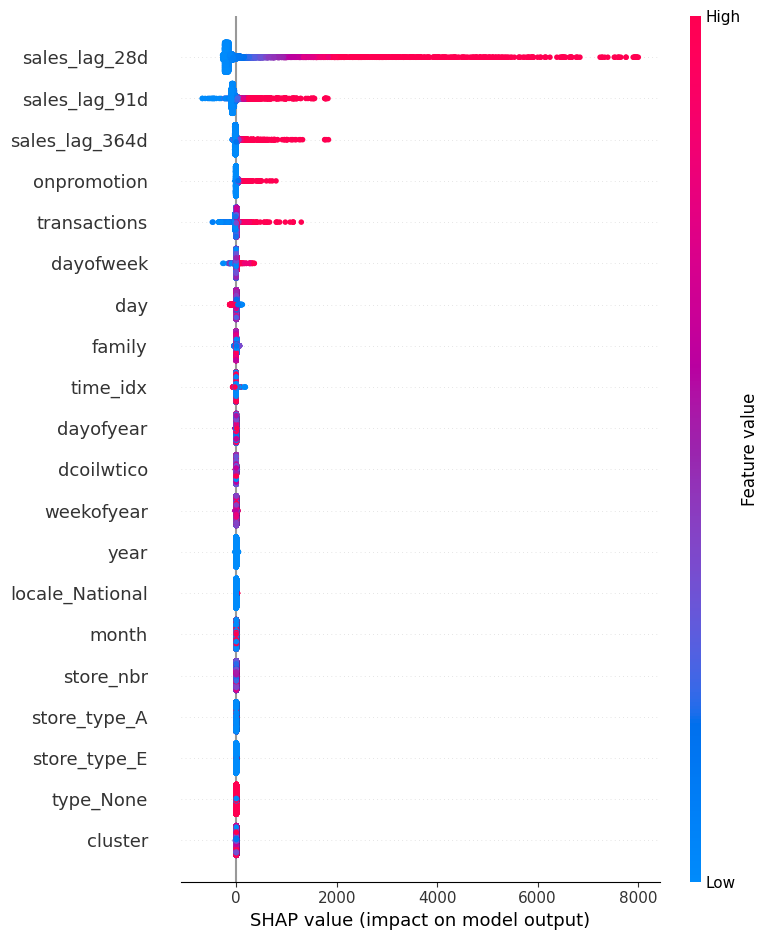

In [7]:
import shap

# 검증 데이터에서 10,000개의 샘플을 무작위로 추출
X_sample = X_valid.sample(n=10000, random_state=42) 

# SHAP Explainer를 생성 (Tree-based 모델용)
explainer = shap.TreeExplainer(model)

# 샘플 데이터에 대한 SHAP 값을 계산
shap_values = explainer.shap_values(X_sample)

# SHAP 요약 플롯(Summary Plot)
print("\nSHAP Summary Plot:")
shap.summary_plot(shap_values, X_sample, plot_type="dot")

베이스라인 모델 SHAP 분석 결과
결론: 기본 피처 엔지니어링은 매우 성공적이었습니다. 모델은 데이터를 기반으로 합리적인 예측 규칙을 잘 만들어냈습니다.

시차(Lag) 피처가 예측을 지배합니다.

무엇을: 가장 중요한 피처 상위 3개가 모두 과거 판매량(sales_lag_...)입니다.

해석: '한 달 전 판매량이 높았다면, 오늘의 예측 판매량도 높게 잡는다'는 가장 상식적인 패턴을 모델이 완벽하게 학습했습니다. 이는 시계열 예측에서 Lag 피처가 얼마나 중요한지를 명확히 보여줍니다.

프로모션과 거래량의 효과는 명확합니다.

무엇을: onpromotion과 transactions 피처 모두 값이 클수록(붉은색 점) 예측값을 높이는(+) 방향에 강하게 분포합니다.

해석: '프로모션 중인 상품이 많거나, 가게에 손님이 많으면 판매량이 늘어난다'는 당연한 비즈니스 논리를 모델이 데이터로 확인하고 예측에 잘 반영하고 있습니다.

시간 피처들이 제 역할을 하고 있습니다.

무엇을: dayofweek(요일), day(일), time_idx(장기 트렌드) 등의 시간 관련 피처들이 중요하게 사용되었습니다.

해석: 주말/주중 판매 패턴, 월급날이나 월말/월초에 소비가 집중되는 월내 주기성(day 효과), 그리고 시간이 지남에 따른 전반적인 매출 증가 트렌드(time_idx)를 모델이 성공적으로 학습했음을 의미합니다.



======================================================================================================================================================================

행동 패턴 기반 클러스터링 피처 생성
가설
단순한 판매량 수치뿐만 아니라, 시간에 따른 판매 패턴이 유사한 상품군이나 상점들은 비슷한 그룹으로 묶일 수 있으며, 이 그룹 정보는 모델에게 강력한 예측 변수가 될 것입니다.

접근 방식
패턴 벡터화: 각 상품군(family) 또는 상점(store_nbr)이 월별(year_month)로 어떤 판매 추이를 보이는지 피봇 테이블을 이용해 하나의 벡터로 만듭니다.

군집화: 생성된 패턴 벡터들은 계층적 군집화(AgglomerativeClustering) 알고리즘을 사용해 유사한 패턴을 가진 그룹으로 묶습니다.

피처 생성: 각 상품군/상점이 어떤 패턴 그룹에 속하는지를 나타내는 새로운 범주형 피처를 생성합니다.

In [ ]:
# 계층 클러스터링 파생변수 생성기

from sklearn.cluster import AgglomerativeClustering

def new_cluster_features(
        df,
        index_col,
        column_col,
        aggfunc,
        n_clusters,
        new_feature_name,
        target='sales'
):      
    """계층적 군집화를 사용하여 시계열 패턴이 유사한 그룹 피처를 생성합니다.

    Args:
        df (pd.DataFrame): 원본 데이터프레임.
        index_col (str): 군집화할 대상 컬럼 (예: 'family', 'store_nbr').
        column_col (str): 시간 축으로 사용할 컬럼 (예: 'year_month').
        aggfunc (str or function): 피봇 테이블에 사용할 집계 함수 (예: 'mean', 'sum').
        n_clusters (int): 생성할 군집의 개수.
        new_feature_name (str): 생성될 새로운 피처의 이름.
        target (str, optional): 집계할 값의 컬럼 이름. Defaults to 'sales'.

    Returns:
        pd.Series: 각 index_col에 해당하는 클러스터 라벨을 담은 Series.
    """

    # 피벗 테이블을 이용해 각 아이템(index_col)의 시간(column_col)에 패턴을 벡톯 변환
    X = pd.pivot_table(
        data=df,
        index=index_col,
        columns=column_col,
        aggfunc=aggfunc,
        values=target,
    ).fillna(0)

    # 2. 계층적 군집화 모델 생성 및 학습
    # linkage='ward'는 각 군집 내의 분산을 최소화하는 방향으로 군집을 형성하여, 패턴이 유사한 아이템들을 효과적으로 묶어줍니다.
    model = AgglomerativeClustering(
        n_clusters=n_clusters,
        linkage='ward'
    )
    model.fit(X)
    labels = model.labels_

    # 3. 아이템과 클러스터 라벨을 매핑하여 새로운 피처(Series)로 반환
    mapping = dict(zip(X.index, labels))
    return df[index_col].map(mapping).rename(new_feature_name)

### 2-2-1. 클러스터링 피처 생성 실행 및 파라미터 설정

앞서 정의한 `new_cluster_features` 함수를 사용하여, 다양한 파라미터 조합으로 클러스터링 피처를 생성하는 실험을 진행합니다. 각 파라미터는 다음과 같은 가설을 검증하기 위해 설정되었습니다.

- **groups**:
  - `('family', 'year_month')`: '상품군'별 판매 트렌드 그룹을 생성합니다. (예: 계절성 상품 vs 꾸준한 상품)
  - `('store_nbr', 'year_month')`: '상점'별 매출 트렌드 그룹을 생성합니다. (예: 성장형 상권 vs 안정형 상권)
- **agg_list**:
  - `'mean'`: 월별 '평균' 판매량 패턴의 유사성을 봅니다.
  - `'sum'`: 월별 '총' 판매량 패턴의 유사성을 봅니다.
- **n_clusters**:
  - `3`과 `5`를 사용하여, 패턴을 크게 묶었을 때와 세분화했을 때의 효과를 비교합니다.

In [ ]:
def run_cluster_features(
        df,
        groups,
        agg_list,
        n_clusters
):
    """주어진 파라미터 조합에 따라 클러스터링 피처를 반복적으로 생성하고
    데이터프레임에 추가하는 래퍼(wrapper) 함수입니다.

    Args:
        df (pd.DataFrame): 원본 데이터프레임.
        groups (list of tuples): 군집화할 대상과 시간 축 컬럼 조합.
        agg_list (list of str): 사용할 집계 함수 리스트.
        n_clusters (list of int): 시도할 군집 개수 리스트.

    Returns:
        pd.DataFrame: 클러스터링 피처가 추가된 데이터프레임.
    """
    for group1, group2 in groups:
        for agg in agg_list:
            for n in n_clusters:
                new_feature_name = f'{group1}_{group2}_cluster_{agg}_{n}'

                if new_feature_name in df.columns:
                    continue


                cluster_feature = new_cluster_features(
                    df=df,
                    index_col=group1,
                    column_col=group2,
                    aggfunc=agg,
                    n_clusters=n,
                    target='sales',
                    new_feature_name=new_feature_name
                )

                df[new_feature_name] = cluster_feature    

    return df

groups = [('family', 'year_month'), ('store_nbr', 'year_month')]
agg_list = ['mean', 'sum']
n_clusters = [3, 5]

df = run_cluster_features(df, groups, agg_list, n_clusters)

#### ===================================================================================
#### 6. 고급 피처 추가 후 성능 비교 및 검증 (클러스터링 피처)
#### ===================================================================================
#### 목표: 이전 베이스라인 모델에 '행동 패턴 기반 클러스터링 피처'를 추가하여,
#### 이 새로운 피처들이 실제로 모델의 예측력을 높이는지 객관적인 수치로 검증합니다.
#### ####===================================================================================

In [ ]:
# --- 1. 시계열 데이터 분할 (이전과 동일한 기준으로) ---
# 공정한 성능 비교를 위해, 데이터 분할 기준은 베이스라인 모델과 완전히 동일하게 유지합니다.
valid_start_date = '2017-07-01'
train_df = df[df['date'] < valid_start_date]
valid_df = df[df['date'] >= valid_start_date]

# *** 이전 모델과의 차이점 ***
# 이제 features 리스트에는 이전에 생성한 'cluster' 관련 컬럼들이 자동으로 포함됩니다.
features = [col for col in df.columns if col not in ['date', 'id', 'sales', 'year_month']]

X_train_new = train_df[features]
y_train_new = train_df['sales']
X_valid_new = valid_df[features]
y_valid_new = valid_df['sales']

print(f"새로운 훈련 데이터: {X_train_new.shape}, 새로운 검증 데이터: {X_valid_new.shape}")


# --- 2. LightGBM 모델 재학습 (이전과 동일한 파라미터로) ---
# 피처의 효과만을 독립적으로 측정하기 위해, 모델의 하이퍼파라미터는 베이스라인과 동일하게 설정합니다.
lgbm_params = {
    'objective': 'regression_l1',
    'metric': 'rmse',
    'n_estimators': 1000,
    'learning_rate': 0.05,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 1,
    'verbose': -1,
    'n_jobs': -1,
    'seed': 42,
    'boosting_type': 'gbdt',
}

model_new = lgb.LGBMRegressor(**lgbm_params)
model_new.fit(X_train_new, y_train_new,
              eval_set=[(X_valid_new, y_valid_new)],
              eval_metric='rmse',
              callbacks=[lgb.early_stopping(100, verbose=True)])


# --- 3. 예측 및 성능 비교 ---
y_pred_new = model_new.predict(X_valid_new)
y_pred_new[y_pred_new < 0] = 0

# 성능 계산
rmse_new = np.sqrt(mean_squared_error(y_valid_new, y_pred_new))
mae_new = mean_absolute_error(y_valid_new, y_pred_new)

def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(np.maximum(0, y_true), np.maximum(0, y_pred)))
    
rmsle_new = rmsle(y_valid_new, y_pred_new)

print("\n--- 클러스터 피처 추가 후 모델 성능 ---")
print(f"새로운 Root Mean Squared Error (RMSE): {rmse_new:.4f}")
print(f"새로운 Mean Absolute Error (MAE): {mae_new:.4f}")
print(f"새로운 Root Mean Squared Logarithmic Error (RMSLE): {rmsle_new:.4f}")

print("\n--- 베이스라인 성능과의 비교 ---")
print(f"기존 RMSE: 257.2118  |  기존 MAE: 70.5416  |  기존 RMSLE: 0.5096")

새로운 훈련 데이터: (2918916, 40), 새로운 검증 데이터: (81972, 40)
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 257.461

--- 클러스터 피처 추가 후 모델 성능 ---
새로운 Root Mean Squared Error (RMSE): 257.4612
새로운 Mean Absolute Error (MAE): 69.4037
새로운 Root Mean Squared Logarithmic Error (RMSLE): 0.4813

--- 베이스라인 성능과의 비교 ---
기존 RMSE: 257.2118  |  기존 MAE: 70.5416  |  기존 RMSLE: 0.5096



클러스터 피처 추가 후 SHAP Summary Plot:


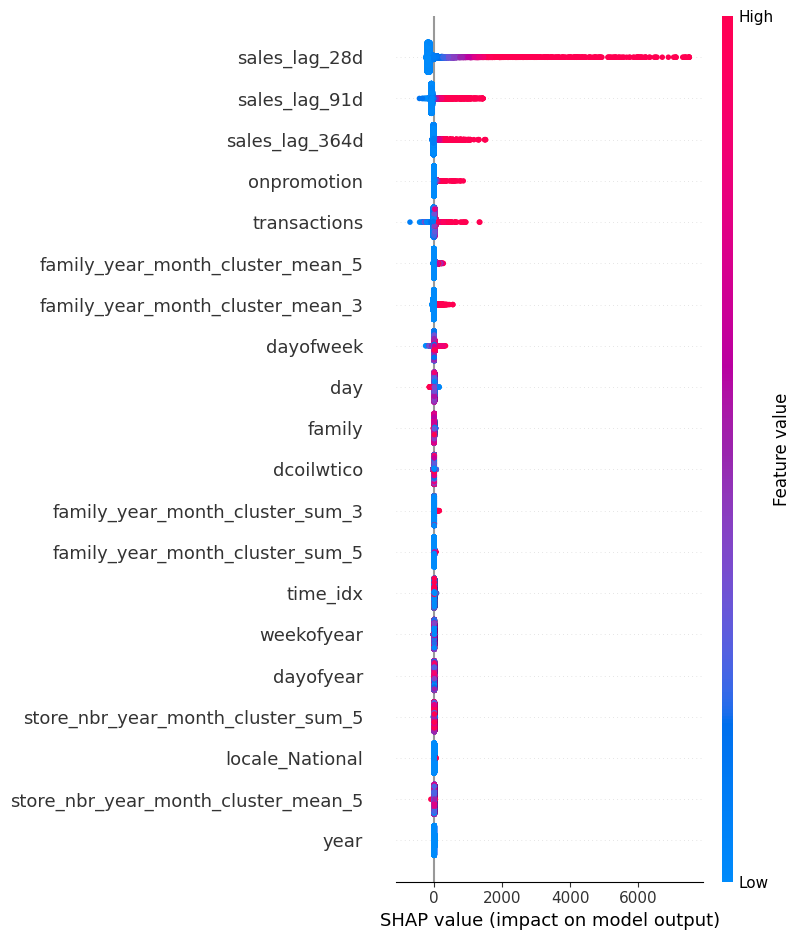

In [14]:
import shap

# 이전과 동일하게 검증 데이터에서 샘플 추출
X_sample_new = X_valid_new.sample(n=10000, random_state=42)

# 새로운 모델(model_new)로 Explainer 생성
explainer_new = shap.TreeExplainer(model_new)

# SHAP 값 계산
shap_values_new = explainer_new.shap_values(X_sample_new)

# SHAP 요약 플롯
print("\n클러스터 피처 추가 후 SHAP Summary Plot:")
shap.summary_plot(shap_values_new, X_sample_new)

모델 해석 및 피처 유효성 검증(SHAP)
베이스라인 모델의 성능(점수)을 확인했으니, 이제 '모델이 왜 그런 예측을 했는지' 내부를 들여다볼 차례입니다. 이전에 베이스 라인 모델을 확인 했던 방법과 동일 한 SHAP 방법을 통해 새로 생성한 클러스터 기반의 피처들이 유효하고 상식적인 방향으로 작동하는지 검증을 해보겠습니다.

클러스 피처 추가 후 SHAP 분석 결과
결론: '행동 패턴'을 그룹화한 클러스터 피처는 모델에 새로운 차원의 유용한 정보를 제공하여 예측 성능을 성공적으로 개선시켰습니다.

1. 클러스터 피처의 높은 중요도 확인
    - 'family_year_month_cluster_mean_5'와 'family_year_month_cluster_mean_3'피처가 전체 피처 중요도 6~7위에 자리 잡았습니다.
    - 해석: 이는 lag나 onpromotion 피처만큼은 아니지만, 다른 시간 기반 피처들만큼이나 강력한 예측 변수로 작용하고 있음을 의미합니다. 우리가 가설을 세우고 공들여 만든 피처가 성공적으로 작동한다는 명백한 증거입니다.

2. '판매 패턴 그룹'의 효과를 모델이 학습함
    - 근거1(사전 정보): family_year_month_cluster_mean_5 피처의 값(0~4)은 '시간에 따른 판매 패턴이 비슷한 상품군 그룹'에 붙인 이름표입니다. 각 클러스터 ID별 평균 판매량 추이를 따로 그려보면, 어떤 ID가 '고성장 그룹'이고 어떤 ID가 '계절성 하락 그룹'인지 파악할 수 있습니다.
    - 근거2(SHAP 증언): SHAP플롯을 보면, 값이 높은 클러스터 ID(붉은색 점)는 HAP value의 오른쪽(예측량 증가)에, 값이 낮은 클러스터 ID(푸른색 점)는 왼쪽(예측량 감소)에 분포합니다.

3. 기존 핵심 피처들의 역할은 여전히 견고함
    - 무엇을: 가장 중요한 피처는 여전히 'sales_lag'시리즈이며, 그 패턴(과거 판매량이 높을수록 예측량 또한 증가)도 이전과 동일하게 매우 정확합니다.
    - 해석: 이는 모델의 기본적인 예측 논리가 안정적으로 유지되는 가운데, 클러스터 피처가 새로운 보조 정보를 제공하며 예측을 더 정교하게 만들고 있음을 의미합니다.


========================================================================

가설
"과거의 특정 시점(Lag)뿐만 아니라, 최근 일정 기간 동안의 판매량 '추세(Trend)'와
'변동성(Volatility)' 또한 미래 판매량을 예측하는 데 중요한 정보일 것이다."

접근 방식
- Rolling: 최근 N일(window) 동안의 평균, 표준편차 등을 계산하여 단기적인 추세를 포착합니다.
- Expanding: 데이터가 시작된 첫날부터 현재까지의 누적 통계를 계산하여 장기적인 흐름을 봅니다.
- EWM (Exponentially Weighted Moving): 최근 데이터에 더 큰 가중치를 부여하여 계산하므로,
변화에 더 민감하게 반응하는 추세를 포착할 수 있습니다.

이 함수는 위 세 가지 방식의 통계 피처를 모두 생성할 수 있는 다용도 생성기입니다.

In [ ]:
def aff_method_stats(
        df,
        group_cols,
        method,
        target='sales',
        window_sizes=[3, 6, 12],  # 1(월)은 거의 변동성이라 분기/반기/연 단위 위주로 설정
        span_list = [2, 4, 6, 12]
):
    """
    다양한 이동 평균 방식(rolling, expanding, ewm)을 사용하여
    그룹별 시계열 통계 피처를 생성하는 다용도 함수입니다.
    """

    # 정확한 계산을 위해 모든 그룹핑 기준과 날짜로 데이터를 정렬합니다.
    all_sort_cols = [col for group in group_cols for col in group] + ['date']
    df = df.sort_values(all_sort_cols).reset_index(drop=True)

    for group1, group2 in group_cols:
        grouped = df.groupby([group1, group2])[target]

        if method in ['rolling', 'expanding']:
            for window in window_sizes:
                # 생성할 피처들의 이름을 동적으로 정의 
                mean = f'{method}_mean_{window}_{group1}_{group2}'
                std = f'{method}_std_{window}_{group1}_{group2}'
                var = f'{method}_var_{window}_{group1}_{group2}'
                cv = f'{method}_cv_{window}_{group1}_{group2}'

                # shift(1)을 사용하여 미래 정보 누수(Data Leakage)를 방지합니다.
                if method == 'rolling':  
                    df[mean] = grouped.transform(lambda x: x.shift(1).rolling(window=window, min_periods=1).mean())
                    df[std] = grouped.transform(lambda x: x.shift(1).rolling(window=window, min_periods=1).std())
                    df[var] = grouped.transform(lambda x: x.shift(1).rolling(window=window, min_periods=1).var())

                if method == 'expanding':  # 전체 누적 통계 계산
                    df[mean] = grouped.transform(lambda x: x.shift(1).expanding(min_periods=1).mean())
                    df[std] = grouped.transform(lambda x: x.shift(1).expanding(min_periods=1).std())
                    df[var] = grouped.transform(lambda x: x.shift(1).expanding(min_periods=1).var())
                # 변동계수(cv): 평균 대비 상대적인 변동성을 나타내는 지표
                df[cv] = df[std] / (df[mean] + 1e-9)

        elif method == 'ewm':  # 최근 값일수록 더 큰 가중치를 주면서 누적 통계량을 계산
            for span in span_list:
                 
                 mean = f'ewm_mean_{span}_{group1}_{group2}'
                 std = f'ewm_std_{span}_{group1}_{group2}'
                 var = f'ewm_var_{span}_{group1}_{group2}'
                 cv = f'ewm_cv_{span}_{group1}_{group2}'
                 
                 df[mean] = grouped.shift(1).transform(lambda x: x.ewm(span=span, min_periods=1).mean())
                 df[std] = grouped.shift(1).transform(lambda x: x.ewm(span=span, min_periods=1).std())
                 df[var] = grouped.shift(1).transform(lambda x: x.ewm(span=span, min_periods=1).var())
                 df[cv] = df[std] / (df[mean] + 1e-9)

    return df

실험 1: 단기/미시적(Micro) Rolling 피처 추가
위에서 만든 다용도 함수를 사용하여, 첫 번째 실험을 진행합니다.
- method: 'rolling' -> 단기 추세에 집중
- group_cols: [('family', 'store_nbr')] -> 가장 세분화된 '개별 상품' 단위의 흐름을 포착

In [ ]:
# 1. 실험할 그룹과 메소드를 하나로 좁힙니다.
group_cols_step1 = [('family', 'store_nbr')]

# 2. rolling 피처만 먼저 생성합니다.
print("Rolling features for ('family', 'store_nbr') generating...")
df = aff_method_stats(df, group_cols_step1, method='rolling')
print("Done.")

# 3. 추가된 피처들의 결측치 처리
#  - 시계열 시작 부분의 결측치는 과거 데이터가 없기 때문에 발생하므로, 0으로 채우는 것이 합리적입니다.
#  - ffill()을 먼저 사용하여 중간에 드물게 발생하는 결측치를 채우고, 그래도 남는 맨 앞부분의 결측치를 0으로 채웁니다.
rolling_cols = [col for col in df.columns if 'rolling' in col]
df[rolling_cols] = df[rolling_cols].ffill().fillna(0) 

Rolling features for ('family', 'store_nbr') generating...
Done.


C:\Users\shoot\AppData\Local\Temp\ipykernel_18756\2700751795.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[rolling_cols] = df[rolling_cols].fillna(method='ffill').fillna(0) # ffill 후 남은 맨 앞 NaN은 0으로


#### ===================================================================================
#### 7. 고급 피처 추가 후 성능 비교 및 검증 (Rolling Features)
#### ===================================================================================
#### Markdown Cell Content:
####
#### ### 실험 목표
#### 이전 단계 모델(클러스터 피처 추가)에 '이동 평균(Rolling) 기반 피처'를 추가하여,
#### '최근의 판매 추세(모멘텀)' 정보가 모델의 예측력을 추가로 향상시키는지 검증합니다.
####
#### ### 성능 비교 기준
#### - 이전 모델 점수: RMSE: 257.4612 | MAE: 69.4037 | RMSLE: 0.4813
#### ===================================================================================


In [ ]:
# --- 1. 시계열 데이터 분할 (기준은 항상 동일하게) ---
# 모든 실험에서 동일한 기준으로 데이터를 분할해야, 피처의 효과를 공정하게 비교할 수 있습니다.
valid_start_date = '2017-07-01'
train_df = df[df['date'] < valid_start_date]
valid_df = df[df['date'] >= valid_start_date]

# *** 이전 모델과의 차이점 ***
# 이제 features 리스트에는 'rolling' 관련 컬럼들이 자동으로 포함됩니다.
features = [col for col in df.columns if col not in ['date', 'id', 'sales', 'year_month']]

X_train_final = train_df[features]
y_train_final = train_df['sales']
X_valid_final = valid_df[features]
y_valid_final = valid_df['sales']

print(f"최종 훈련 데이터: {X_train_final.shape}, 최종 검증 데이터: {X_valid_final.shape}")


# --- 2. LightGBM 모델 재학습 (파라미터는 이전과 동일하게) ---
# 피처의 효과만을 독립적으로 측정하기 위해, 모델의 하이퍼파라미터는 이전 실험과 동일하게 설정합니다.
lgbm_params = {
    'objective': 'regression_l1',
    'metric': 'rmse',
    'n_estimators': 1000,
    'learning_rate': 0.05,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 1,
    'verbose': -1,
    'n_jobs': -1,
    'seed': 42,
    'boosting_type': 'gbdt',
}

model_final = lgb.LGBMRegressor(**lgbm_params)
model_final.fit(X_train_final, y_train_final,
              eval_set=[(X_valid_final, y_valid_final)],
              eval_metric='rmse',
              callbacks=[lgb.early_stopping(100, verbose=True)])


# --- 3. 예측 및 최종 성능 비교 ---
y_pred_final = model_final.predict(X_valid_final)
y_pred_final[y_pred_final < 0] = 0

# 성능 계산
rmse_final = np.sqrt(mean_squared_error(y_valid_final, y_pred_final))
mae_final = mean_absolute_error(y_valid_final, y_pred_final)

def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(np.maximum(0, y_true), np.maximum(0, y_pred)))
    
rmsle_final = rmsle(y_valid_final, y_pred_final)

print("\n--- Rolling 피처 추가 후 모델 성능 ---")
print(f"최종 Root Mean Squared Error (RMSE): {rmse_final:.4f}")
print(f"최종 Mean Absolute Error (MAE): {mae_final:.4f}")
print(f"최종 Root Mean Squared Logarithmic Error (RMSLE): {rmsle_final:.4f}")

print("\n--- 이전 단계 성능과의 비교 ---")
print(f"이전 RMSE: 257.4612  |  이전 MAE: 69.4037  |  이전 RMSLE: 0.4813")

최종 훈련 데이터: (2918916, 52), 최종 검증 데이터: (81972, 52)
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 216.381

--- Rolling 피처 추가 후 모델 성능 ---
최종 Root Mean Squared Error (RMSE): 216.3814
최종 Mean Absolute Error (MAE): 59.6000
최종 Root Mean Squared Logarithmic Error (RMSLE): 0.3934

--- 이전 단계 성능과의 비교 ---
이전 RMSE: 257.4612  |  이전 MAE: 69.4037  |  이전 RMSLE: 0.4813


## 8. 최종 모델 해석 및 피처 유효성 검증 (SHAP)

이동 평균(Rolling) 피처까지 추가한 최종 모델의 성능이 크게 향상된 것을 확인했습니다. 이제 마지막으로 SHAP 플롯을 통해 **'왜' 성능이 개선되었는지** 그 원인을 분석합니다.

이전 베이스라인 모델의 SHAP 플롯과 비교하여, 새로 추가된 피처들이 모델의 예측에 어떤 영향을 주었는지, 그리고 기존 피처들의 중요도에 어떤 변화를 가져왔는지 확인하는 것이 핵심입니다.

#### **이번 플롯에서 중점적으로 확인할 부분**
1.  **새로운 Rolling 피처의 중요도:** `rolling_mean`, `rolling_std` 같은 피처들이 중요도 상위권에 새롭게 등장했는가?
2.  **피처 중요도의 재분배:** `Rolling` 피처가 추가되면서, 이전에 가장 중요했던 `sales_lag` 피처의 영향력은 어떻게 변했는가?
3.  **패턴의 합리성:** 새로 등장한 중요 피처들의 패턴(붉은색/푸른색 점의 분포)이 우리의 상식과 비즈니스 논리에 부합하는가?

최종 모델 SHAP 값 계산 중...

Rolling 피처 추가 후 SHAP Summary Plot:


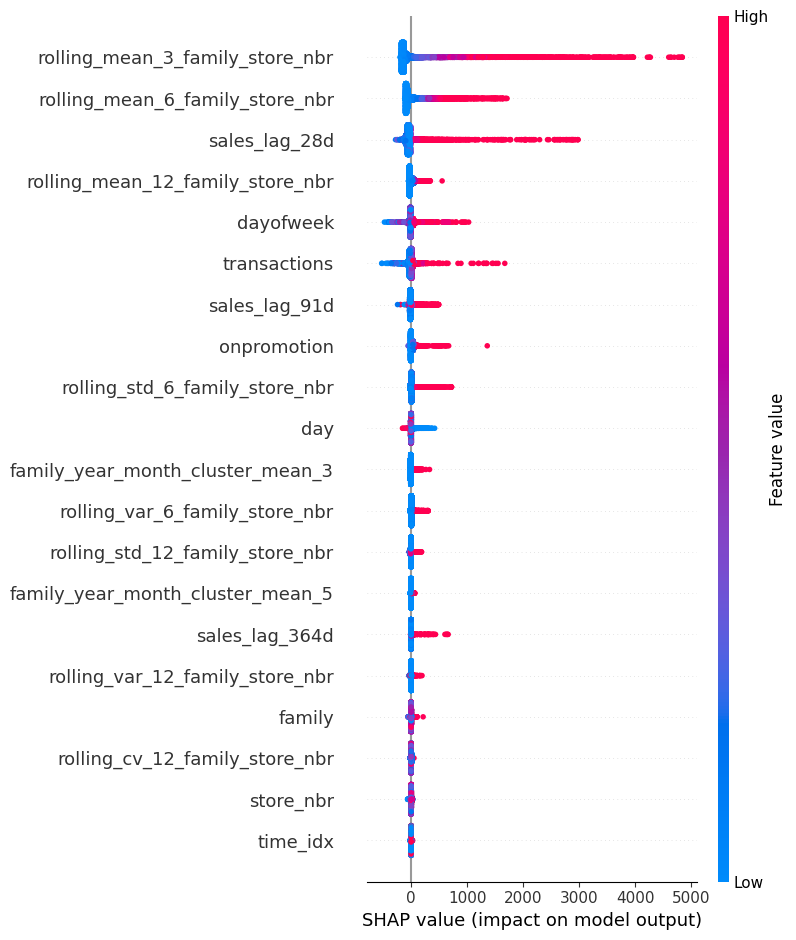

In [19]:
import shap

# 최종 검증 데이터에서 샘플 추출
X_sample_final = X_valid_final.sample(n=10000, random_state=42)

# 최종 모델(model_final)로 Explainer 생성
explainer_final = shap.TreeExplainer(model_final)

# SHAP 값 계산
shap_values_final = explainer_final.shap_values(X_sample_final)

# SHAP 요약 플롯
print("\nRolling 피처 추가 후 SHAP Summary Plot:")
shap.summary_plot(shap_values_final, X_sample_final)

#### ===================================================================================
#### 이동 평균(Moving Average) 기반 피처 생성 (단기/장기 및 미시/거시 추세 결합)
#### ===================================================================================
#### Markdown Cell Content:
####
#### ### 가설
#### "단기적인 판매 추세(모멘텀)와 장기적인 계절성/트렌드를 모두 반영하고,
#### 개별 상품(미시적)뿐만 아니라 카테고리/상점 전체(거시적)의 흐름까지 고려하면
#### 모델의 예측력이 극대화될 것이다."
####
#### ### 접근 방식
#### - **단기(Short-term) 추세:** `window_sizes=[3, 6, 12]`를 사용하여 주간(weekly) 모멘텀을 포착합니다.
#### - **장기(Long-term) 추세:** `window_sizes=[28, 91, 364]`를 사용하여 월별/분기별/연간 흐름을 포착합니다.
#### - **미시적(Micro) 관점:** `['family', 'store_nbr']` 그룹으로 개별 상품의 흐름을 분석합니다.
#### - **거시적(Macro) 관점:** `['family']`, `['store_nbr']` 그룹으로 카테고리 전체 및 상점 전체의 트렌드를 분석합니다.
#### ===================================================================================

In [ ]:
# 'rolling' 피처 생성 전용 함수 (var 피처 추가)
def create_rolling_features(
    df,
    group_cols_list,
    target='sales',
    window_sizes=[28, 91, 364]
):
    """
    그룹별로 rolling 통계 피처(mean, std, var, cv)를 생성합니다.
    shift(1)을 사용하여 미래 정보 누수(Data Leakage)를 방지합니다.
    """
    df_copy = df.copy()
    
    for group_keys in group_cols_list:
        group_name = '_'.join(group_keys)
        
        df_copy = df_copy.sort_values(by=group_keys + ['date'], ascending=True).reset_index(drop=True)
        
        grouped = df_copy.groupby(group_keys)[target]
        
        for window in window_sizes:
            mean_col = f'rolling_mean_{window}d_{group_name}'
            std_col = f'rolling_std_{window}d_{group_name}'
            var_col = f'rolling_var_{window}d_{group_name}' # 분산 피처 추가
            cv_col = f'rolling_cv_{window}d_{group_name}'
            
            shifted_data = grouped.shift(1)
            
            rolling_mean = shifted_data.rolling(window=window, min_periods=1).mean()
            rolling_std = shifted_data.rolling(window=window, min_periods=1).std()
            rolling_var = shifted_data.rolling(window=window, min_periods=1).var() # 분산 계산
            
            df_copy[mean_col] = rolling_mean
            df_copy[std_col] = rolling_std
            df_copy[var_col] = rolling_var # 분산 피처 할당
            df_copy[cv_col] = rolling_std / (rolling_mean + 1e-9)
                
    return df_copy

# --- 실제 실행 ---
# 1. 모든 그룹 조합 정의
group_list_all = [
    ['family', 'store_nbr'], # 미시적
    ['family'],              # 거시적
    ['store_nbr']            # 거시적
]

# 2. 윈도우 사이즈 정의
short_term_windows = [3, 6, 12]
long_term_windows = [28, 91, 364]

# 3. 먼저 기존에 생성했던 rolling 피처들을 모두 삭제하여 초기화합니다.
#    (중복 생성을 방지하고 깔끔하게 다시 만들기 위함)
cols_to_drop = [col for col in df.columns if 'rolling' in col]
df.drop(columns=cols_to_drop, inplace=True)
print(f"{len(cols_to_drop)}개의 기존 Rolling 피처를 삭제했습니다.")

# 4. 단기(Short-term) Rolling 피처 생성
df = create_rolling_features(df, group_list_all, target='sales', window_sizes=short_term_windows)
print("단기 피처 생성 완료.")

# 5. 장기(Long-term) Rolling 피처 생성
df = create_rolling_features(df, group_list_all, target='sales', window_sizes=long_term_windows)
print("장기 피처 생성 완료.")


# 6. 생성된 모든 rolling 피처에 대해 결측치 처리
rolling_cols = [col for col in df.columns if 'rolling' in col]
df[rolling_cols] = df[rolling_cols].ffill().fillna(0)
print("\n결측치 처리 완료.")

# 최종 피처 수 확인
print(f"\n총 {len(rolling_cols)}개의 균형 잡힌 Rolling 피처가 최종적으로 생성되었습니다.")

39개의 기존 Rolling 피처를 삭제했습니다.

단기 Rolling 피처 생성 중...
단기 피처 생성 완료.

장기 Rolling 피처 생성 중...
장기 피처 생성 완료.

결측치 처리 완료.

총 72개의 균형 잡힌 Rolling 피처가 최종적으로 생성되었습니다.


#### ===================================================================================
#### 7. 고급 피처 추가 후 성능 비교 및 검증 (Rolling Features)
#### ===================================================================================
#### Markdown Cell Content:
####
#### ### 실험 목표
#### 이전 단계 모델(클러스터 피처 추가)에 '이동 평균(Rolling) 기반 피처'를 추가하여,
#### '최근의 판매 추세(모멘텀)' 정보가 모델의 예측력을 추가로 향상시키는지 검증합니다.
####
#### ### 성능 비교 기준
#### - 이전 모델 점수: RMSE: 257.4612 | MAE: 69.4037 | RMSLE: 0.4813
#### ===================================================================================

In [24]:
# --- 1. 시계열 데이터 분할 (기준은 항상 동일하게) ---
valid_start_date = '2017-07-01'
train_df = df[df['date'] < valid_start_date]
valid_df = df[df['date'] >= valid_start_date]

# rolling 피처가 포함된 새로운 피처 리스트
features = [col for col in df.columns if col not in ['date', 'id', 'sales', 'year_month']]

X_train_final = train_df[features]
y_train_final = train_df['sales']
X_valid_final = valid_df[features]
y_valid_final = valid_df['sales']

print(f"최종 훈련 데이터: {X_train_final.shape}, 최종 검증 데이터: {X_valid_final.shape}")


# --- 2. LightGBM 모델 재학습 (파라미터는 이전과 동일하게) ---
lgbm_params = {
    'objective': 'regression_l1',
    'metric': 'rmse',
    'n_estimators': 1000,
    'learning_rate': 0.05,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 1,
    'verbose': -1,
    'n_jobs': -1,
    'seed': 42,
    'boosting_type': 'gbdt',
}

model_final = lgb.LGBMRegressor(**lgbm_params)
model_final.fit(X_train_final, y_train_final,
              eval_set=[(X_valid_final, y_valid_final)],
              eval_metric='rmse',
              callbacks=[lgb.early_stopping(100, verbose=True)])


# --- 3. 예측 및 최종 성능 비교 ---
y_pred_final = model_final.predict(X_valid_final)
y_pred_final[y_pred_final < 0] = 0

# 성능 계산
rmse_final = np.sqrt(mean_squared_error(y_valid_final, y_pred_final))
mae_final = mean_absolute_error(y_valid_final, y_pred_final)

def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(np.maximum(0, y_true), np.maximum(0, y_pred)))
    
rmsle_final = rmsle(y_valid_final, y_pred_final)

print("\n--- Rolling 피처 추가 후 모델 성능 ---")
print(f"최종 Root Mean Squared Error (RMSE): {rmse_final:.4f}")
print(f"최종 Mean Absolute Error (MAE): {mae_final:.4f}")
print(f"최종 Root Mean Squared Logarithmic Error (RMSLE): {rmsle_final:.4f}")


최종 훈련 데이터: (2918916, 112), 최종 검증 데이터: (81972, 112)
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[999]	valid_0's rmse: 196.615

--- Rolling 피처 추가 후 모델 성능 ---
최종 Root Mean Squared Error (RMSE): 196.6147
최종 Mean Absolute Error (MAE): 54.2240
최종 Root Mean Squared Logarithmic Error (RMSLE): 0.4140


========================================================================
8. 최종 모델 해석 및 피처 유효성 검증 (SHAP)
이동 평균(Rolling) 피처까지 추가한 최종 모델의 성능이 크게 향상된 것을 확인했습니다. 이제 마지막으로 SHAP 플롯을 통해 '왜' 성능이 개선되었는지 그 원인을 분석합니다.

이전 베이스라인 모델의 SHAP 플롯과 비교하여, 새로 추가된 피처들이 모델의 예측에 어떤 영향을 주었는지, 그리고 기존 피처들의 중요도에 어떤 변화를 가져왔는지 확인하는 것이 핵심입니다.

이번 플롯에서 중점적으로 확인할 부분
새로운 Rolling 피처의 중요도: rolling_mean, rolling_std 같은 피처들이 중요도 상위권에 새롭게 등장했는가?

피처 중요도의 재분배: Rolling 피처가 추가되면서, 이전에 가장 중요했던 sales_lag 피처의 영향력은 어떻게 변했는가?

패턴의 합리성: 새로 등장한 중요 피처들의 패턴(붉은색/푸른색 점의 분포)이 우리의 상식과 비즈니스 논리에 부합하는가?


Rolling 피처 추가 후 SHAP Summary Plot:


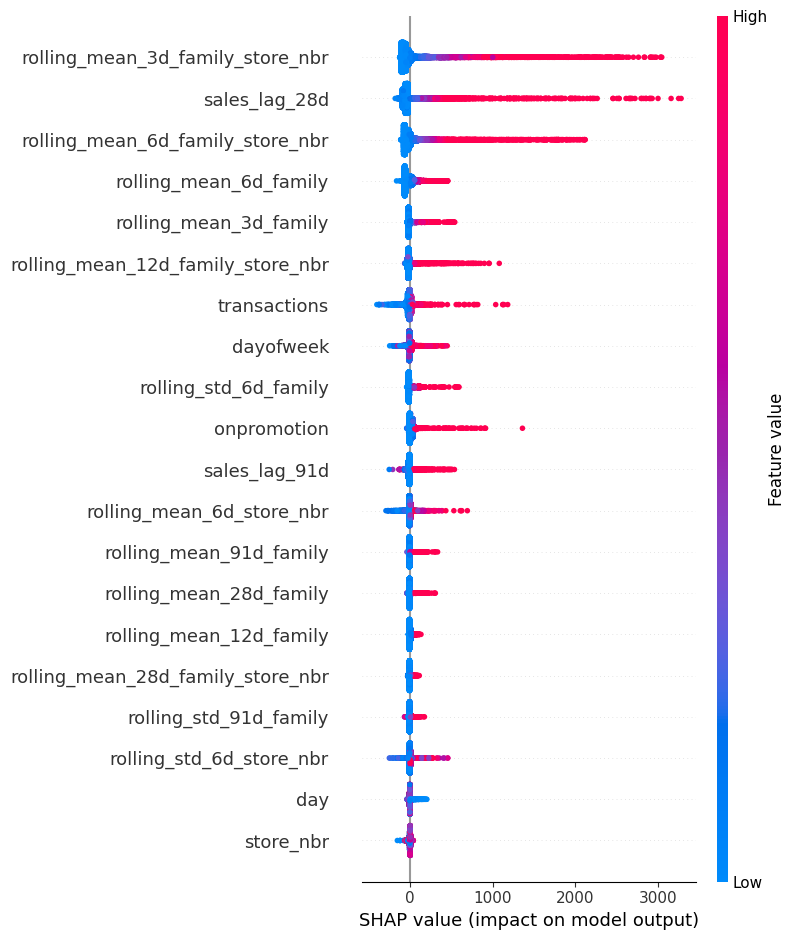

In [25]:
import shap

# 최종 검증 데이터에서 샘플 추출
X_sample_final = X_valid_final.sample(n=10000, random_state=42)

# 최종 모델(model_final)로 Explainer 생성
explainer_final = shap.TreeExplainer(model_final)

# SHAP 값 계산
shap_values_final = explainer_final.shap_values(X_sample_final)

# SHAP 요약 플롯
print("\nRolling 피처 추가 후 SHAP Summary Plot:")
shap.summary_plot(shap_values_final, X_sample_final)

#### ===================================================================================
#### 9. 타겟 변수 불균형 문제 해결: 로그 변환 (Log Transformation)
#### ===================================================================================
####
#### ### 가설
#### EDA 단계에서 확인했듯이, 타겟 변수인 'sales'는 0에 매우 쏠려있는 불균형한 분포(zero-inflated)를 가집니다.
#### 이러한 분포는 모델이 패턴을 학습하는 것을 방해할 수 있습니다.
#### 타겟 변수에 로그 변환을 적용하여 분포를 정규분포에 가깝게 만들면,
#### 모델이 특히 판매량이 적은 상품들의 패턴을 더 효과적으로 학습하여 성능이 개선될 것입니다.
####
#### ### 접근 방식
#### 1.  **로그 변환:** `np.log1p()`를 사용하여 `sales` 값을 변환합니다. (`log1p`는 0을 포함한 값도 안전하게 변환)
#### 2.  **모델 학습:** 모델은 변환된 로그 값을 예측하도록 학습합니다.
#### 3.  **역변환:** 모델이 내놓은 예측값에 `np.expm1()`을 적용하여 원래의 판매량 스케일로 복원한 뒤 성능을 평가합니다.
#### ===================================================================================

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error

# --- 1. 시계열 데이터 분할 (이전과 동일) ---
valid_start_date = '2017-07-01'
train_df = df[df['date'] < valid_start_date]
valid_df = df[df['date'] >= valid_start_date]

features = [col for col in df.columns if col not in ['date', 'id', 'sales', 'year_month']]

X_train_final = train_df[features]
y_train_final = train_df['sales']
X_valid_final = valid_df[features]
y_valid_final = valid_df['sales']

# --- 2. 타겟 변수 로그 변환 (핵심 변경 사항) ---
# np.log1p는 log(1+x)를 계산하여 x=0일 때도 안전하게 변환합니다.
y_train_log = np.log1p(y_train_final)

print("타겟 변수 로그 변환 완료.")

# --- 3. LightGBM 모델 재학습 (로그 변환된 타겟으로) ---
# 로그 변환된 타겟은 분포가 더 안정적이므로, RMSE(l2)를 objective로 사용해도 좋습니다.
lgbm_params_log = {
    'objective': 'regression_l2', # RMSE
    'metric': 'rmse',
    'n_estimators': 1000,
    'learning_rate': 0.05,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 1,
    'verbose': -1,
    'n_jobs': -1,
    'seed': 42,
    'boosting_type': 'gbdt',
}

model_log = lgb.LGBMRegressor(**lgbm_params_log)
# 검증셋의 타겟도 로그 변환하여 early stopping에 사용합니다.
model_log.fit(X_train_final, y_train_log,
              eval_set=[(X_valid_final, np.log1p(y_valid_final))],
              eval_metric='rmse',
              callbacks=[lgb.early_stopping(100, verbose=True)])

# --- 4. 예측 및 원래 스케일로 복원 ---
y_pred_log = model_log.predict(X_valid_final)

# np.expm1은 log1p의 역함수로, 예측값을 원래 판매량 스케일로 되돌립니다.
y_pred_final_log_transform = np.expm1(y_pred_log)

# 복원된 값 중 음수가 있을 경우 0으로 처리
y_pred_final_log_transform[y_pred_final_log_transform < 0] = 0

# --- 5. 성능 평가 ---
rmse_final = np.sqrt(mean_squared_error(y_valid_final, y_pred_final_log_transform))
mae_final = mean_absolute_error(y_valid_final, y_pred_final_log_transform)

def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(np.maximum(0, y_true), np.maximum(0, y_pred)))
    
rmsle_final = rmsle(y_valid_final, y_pred_final_log_transform)

print("\n--- 로그 변환 모델 성능 ---")
print(f"최종 Root Mean Squared Error (RMSE): {rmse_final:.4f}")
print(f"최종 Mean Absolute Error (MAE): {mae_final:.4f}")
print(f"최종 Root Mean Squared Logarithmic Error (RMSLE): {rmsle_final:.4f}")

print("\n--- 이전 단계 성능과의 비교 ---")
print(f"이전 RMSE: 196.6147  |  이전 MAE: 54.2240  |  이전 RMSLE: 0.4140")


타겟 변수 로그 변환 완료.
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.379366

--- 로그 변환 모델 성능 ---
최종 Root Mean Squared Error (RMSE): 198.9012
최종 Mean Absolute Error (MAE): 54.8957
최종 Root Mean Squared Logarithmic Error (RMSLE): 0.3793

--- 이전 단계 성능과의 비교 ---
이전 RMSE: 196.6147  |  이전 MAE: 54.2240  |  이전 RMSLE: 0.4140


#### ===================================================================================
#### 피처 안정성을 위한 분포 변환 (Feature Transformation)
#### ===================================================================================
####
#### ### 가설
#### 이론적으로 트리 기반 모델은 피처의 분포에 크게 영향을 받지 않지만, 실제로는 분포가 한쪽으로
#### 심하게 쏠린(왜도가 높은) 피처를 변환해주면 모델이 더 안정적이고 좋은 성능을 내는 경우가 많습니다.
#### 이는 이상치(outlier)의 영향을 줄이고, 모델이 더 의미 있는 분기점을 찾는 데 도움을 줄 수 있기 때문입니다.
####
#### ### 접근 방식
#### 1.  **변환 대상 선별:** 피처의 비대칭성을 나타내는 '왜도(Skewness)'를 계산하여 임계값(예: 1.0)을 넘는 피처를 변환 대상으로 선정합니다.
#### 2.  **데이터 특성에 맞는 변환법 적용:**
####    - **0을 포함한 양수 데이터:** `np.log1p()` 로그 변환을 적용하여 분포를 완만하게 만듭니다.
####     - **음수 데이터 포함:** 로그 변환을 적용할 수 없으므로, 음수 값도 처리 가능한 `여-존슨(Yeo-Johnson)` 변환을 적용합니다.
#### ===================================================================================

In [27]:
from scipy.stats import skew, yeojohnson

def transform_skewed_features(df, features_to_check, skew_threshold=1.0):
    """
    데이터프레임에서 왜도가 높은 숫자형 피처를 찾아 적절한 변환을 적용합니다.
    """
    df_copy = df.copy()
    
    # 왜도 계산
    skewed_feats = df_copy[features_to_check].apply(lambda x: skew(x.dropna()))
    print(f"왜도 계산 완료. 총 {len(features_to_check)}개 피처 확인.")
    
    # 왜도 임계값을 넘는 피처들만 선별
    skewed_feats = skewed_feats[abs(skewed_feats) > skew_threshold]
    print(f"왜도 > {skew_threshold} 인 피처 {len(skewed_feats)}개를 찾았습니다.")
    
    # 변환 적용
    for feat in skewed_feats.index:
        # 0을 포함한 양수 데이터는 log1p 변환
        if (df_copy[feat] >= 0).all():
            print(f"  - '{feat}' (왜도: {skewed_feats[feat]:.2f}) -> 로그 변환 적용")
            df_copy[feat] = np.log1p(df_copy[feat])
        # 음수가 포함된 데이터는 Yeo-Johnson 변환
        else:
            print(f"  - '{feat}' (왜도: {skewed_feats[feat]:.2f}) -> 여-존슨 변환 적용")
            df_copy[feat], _ = yeojohnson(df_copy[feat])
            
    return df_copy

# --- 실제 실행 ---
# 1. 변환을 고려할 숫자형 피처 리스트 준비
#    (ID, 타겟, 원핫인코딩된 컬럼 등은 제외)
features_to_exclude = ['id', 'sales', 'year_month', 'will_sell'] + [col for col in df.columns if 'type_' in col or 'locale_' in col]
numeric_features_to_check = [col for col in df.select_dtypes(include=np.number).columns if col not in features_to_exclude]

# 2. 왜도 기반 변환 실행
df_transformed = transform_skewed_features(df, numeric_features_to_check, skew_threshold=1.0)

print("\n피처 변환 완료.")


왜도 계산 완료. 총 96개 피처 확인.
왜도 > 1.0 인 피처 76개를 찾았습니다.
  - 'onpromotion' (왜도: 11.17) -> 로그 변환 적용
  - 'transactions' (왜도: 1.17) -> 로그 변환 적용
  - 'sales_lag_28d' (왜도: 7.48) -> 로그 변환 적용
  - 'sales_lag_91d' (왜도: 7.73) -> 로그 변환 적용
  - 'sales_lag_364d' (왜도: 8.80) -> 로그 변환 적용
  - 'family_year_month_cluster_mean_3' (왜도: 3.52) -> 로그 변환 적용
  - 'family_year_month_cluster_mean_5' (왜도: 2.91) -> 로그 변환 적용
  - 'family_year_month_cluster_sum_3' (왜도: 3.52) -> 로그 변환 적용
  - 'family_year_month_cluster_sum_5' (왜도: 2.91) -> 로그 변환 적용
  - 'store_nbr_year_month_cluster_mean_3' (왜도: 1.32) -> 로그 변환 적용
  - 'rolling_mean_3d_family_store_nbr' (왜도: 5.96) -> 로그 변환 적용
  - 'rolling_std_3d_family_store_nbr' (왜도: 28.19) -> 로그 변환 적용
  - 'rolling_var_3d_family_store_nbr' (왜도: 546.10) -> 로그 변환 적용
  - 'rolling_cv_3d_family_store_nbr' (왜도: 1.82) -> 로그 변환 적용
  - 'rolling_mean_6d_family_store_nbr' (왜도: 5.61) -> 로그 변환 적용
  - 'rolling_std_6d_family_store_nbr' (왜도: 17.94) -> 로그 변환 적용
  - 'rolling_var_6d_family_store_nbr' (왜도: 376.64) -> 로

#### ===================================================================================
#### 최종 모델 성능 평가 (피처 변환 + 타겟 로그 변환)
#### ===================================================================================
####
#### ### 실험 목표
#### 이전 단계에서 왜도가 높은 피처들의 분포를 안정시킨 최종 피처 셋(`df_transformed`)을 완성했습니다.
#### 이제 이 최종 피처 셋과, 타겟 변수의 불균형 문제를 해결하는 데 효과적이었던
#### '타겟 로그 변환'을 함께 적용했을 때 모델의 성능이 추가적으로 개선되는지 최종적으로 검증합니다.
####
#### ### 성능 비교 기준
#### - 이전 최고 성능 (타겟 로그 변환만 적용): RMSE: 198.9012 | MAE: 54.8957 | RMSLE: 0.3793
#### ===================================================================================

In [28]:
# --- 1. 변환된 데이터프레임으로 분할 ---
# 이전 단계에서 생성한 df_transformed 사용
valid_start_date = '2017-07-01'
train_df = df_transformed[df_transformed['date'] < valid_start_date]
valid_df = df_transformed[df_transformed['date'] >= valid_start_date]

features = [col for col in df_transformed.columns if col not in ['date', 'id', 'sales', 'year_month', 'will_sell']]

X_train_final = train_df[features]
y_train_final = train_df['sales']
X_valid_final = valid_df[features]
y_valid_final = valid_df['sales']

# --- 2. 타겟 변수 로그 변환 ---
y_train_log = np.log1p(y_train_final)
print("타겟 변수 로그 변환 완료.")

# --- 3. LightGBM 모델 재학습 (로그 변환된 타겟으로) ---
lgbm_params_log = {
    'objective': 'regression_l2',
    'metric': 'rmse',
    'n_estimators': 1000,
    'learning_rate': 0.05,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 1,
    'verbose': -1,
    'n_jobs': -1,
    'seed': 42,
    'boosting_type': 'gbdt',
}

model_final_transformed = lgb.LGBMRegressor(**lgbm_params_log)
model_final_transformed.fit(X_train_final, y_train_log,
                          eval_set=[(X_valid_final, np.log1p(y_valid_final))],
                          eval_metric='rmse',
                          callbacks=[lgb.early_stopping(100, verbose=True)])

# --- 4. 예측 및 원래 스케일로 복원 ---
y_pred_log = model_final_transformed.predict(X_valid_final)
y_pred_final_transformed = np.expm1(y_pred_log)
y_pred_final_transformed[y_pred_final_transformed < 0] = 0

# --- 5. 성능 평가 ---
rmse_final = np.sqrt(mean_squared_error(y_valid_final, y_pred_final_transformed))
mae_final = mean_absolute_error(y_valid_final, y_pred_final_transformed)

def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(np.maximum(0, y_true), np.maximum(0, y_pred)))
    
rmsle_final = rmsle(y_valid_final, y_pred_final_transformed)

print("\n--- 피처 변환 + 로그 변환 모델 최종 성능 ---")
print(f"최종 Root Mean Squared Error (RMSE): {rmse_final:.4f}")
print(f"최종 Mean Absolute Error (MAE): {mae_final:.4f}")
print(f"최종 Root Mean Squared Logarithmic Error (RMSLE): {rmsle_final:.4f}")

print("\n--- 이전 최고 성능(로그 변환 모델)과의 비교 ---")
print(f"이전 RMSE: 198.9012  |  이전 MAE: 54.8957  |  이전 RMSLE: 0.3793")

타겟 변수 로그 변환 완료.
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.378282

--- 피처 변환 + 로그 변환 모델 최종 성능 ---
최종 Root Mean Squared Error (RMSE): 197.5403
최종 Mean Absolute Error (MAE): 54.5819
최종 Root Mean Squared Logarithmic Error (RMSLE): 0.3783

--- 이전 최고 성능(로그 변환 모델)과의 비교 ---
이전 RMSE: 198.9012  |  이전 MAE: 54.8957  |  이전 RMSLE: 0.3793


#### ===================================================================================
#### 하이퍼파라미터 튜닝 (Hyperparameter Tuning with Optuna)
#### ===================================================================================
####
#### ### 실험 목표
#### 피처 엔지니어링과 전처리를 통해 모델의 구조를 최적화했으니, 이제 모델의 세부 설정(하이퍼파라미터)을
#### 튜닝하여 성능을 마지막 한 방울까지 끌어올립니다.
####
#### ### 접근 방식: 베이지안 최적화 (Optuna)
#### 모든 파라미터 조합을 무작정 탐색하는 Grid Search와 달리, Optuna는 베이지안 최적화 기법을 사용하여
#### 이전 시도의 결과를 바탕으로 더 좋은 점수가 나올 확률이 높은 영역을 지능적으로 탐색합니다.
#### 따라서 훨씬 적은 시도만으로도 효율적으로 최적의 파라미터 조합을 찾을 수 있습니다.
####
#### ### 최적화 목표 지표: RMSLE
#### 이전 실험에서 저판매량 상품 예측에 더 효과적임을 확인한 RMSLE를 최소화하는 것을 목표로 설정합니다.
#### ===================================================================================


In [ ]:
import optuna

# --- 1. 데이터 준비 (이전 단계에서 변환된 최종 데이터프레임 사용) ---
# df_transformed 가 최종 피처 변환이 완료된 데이터프레임이라고 가정합니다.
valid_start_date = '2017-07-01'
train_df = df_transformed[df_transformed['date'] < valid_start_date]
valid_df = df_transformed[df_transformed['date'] >= valid_start_date]

features = [col for col in df_transformed.columns if col not in ['date', 'id', 'sales', 'year_month', 'will_sell']]

X_train = train_df[features]
y_train = train_df['sales']
X_valid = valid_df[features]
y_valid = valid_df['sales']

# 타겟 변수 로그 변환
y_train_log = np.log1p(y_train)
y_valid_log = np.log1p(y_valid)


# --- 2. RMSLE 평가 함수 정의 ---
def rmsle(y_true, y_pred):
    # np.expm1을 통해 로그 스케일의 예측값을 원래 스케일로 복원
    y_pred_restored = np.expm1(y_pred)
    y_pred_restored[y_pred_restored < 0] = 0 # 음수 방지
    return np.sqrt(mean_squared_log_error(y_true, y_pred_restored))

# --- 3. Optuna Objective 함수 정의 ---
# 이 함수는 Optuna가 최적화할 목표(score)를 계산하고 반환합니다.
def objective(trial):
    # 탐색할 하이퍼파라미터의 범위(search space)를 정의합니다.
    # trial.suggest_... 메소드를 통해 각 파라미터의 타입과 범위를 지정합니다.
    params = {
        'objective': 'regression_l1', # MAE
        'metric': 'rmse',
        'n_estimators': trial.suggest_int('n_estimators', 500, 2000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'num_leaves': trial.suggest_int('num_leaves', 20, 300),
        'max_depth': trial.suggest_int('max_depth', 5, 15),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0),
        'n_jobs': -1,
        'seed': 42,
        'boosting_type': 'gbdt',
    }
    
    # 모델 학습
    model = lgb.LGBMRegressor(**params)
    model.fit(X_train, y_train_log,
              eval_set=[(X_valid, y_valid_log)],
              eval_metric='rmse',
              callbacks=[lgb.early_stopping(100, verbose=False)])
    
    # 예측 및 평가
    # 검증셋의 실제 타겟은 원래 스케일(y_valid)을 사용해야 합니다.
    preds_log = model.predict(X_valid)
    
    # RMSLE 점수 계산
    # y_valid는 원래 스케일, preds_log는 로그 스케일이므로 rmsle 함수 내에서 복원됩니다.
    rmsle_score = rmsle(y_valid, preds_log)
    
    return rmsle_score

# --- 4. 튜닝 실행 ---
# 'minimize' 방향으로 RMSLE 점수를 최적화하는 Study 객체 생성
study = optuna.create_study(direction='minimize')

# 30번의 시도를 통해 최적의 파라미터를 탐색합니다. (시간이 있다면 50~100번 시도도 좋습니다)
print("하이퍼파라미터 튜닝 시작... (n_trials=30)")
study.optimize(objective, n_trials=30)

# --- 5. 최적 결과 확인 ---
print("\n--- 튜닝 완료 ---")
print(f"최적 시도 횟수: {study.best_trial.number}")
print(f"최적 RMSLE 점수: {study.best_value:.4f}")
print("최적 하이퍼파라미터:")
for key, value in study.best_params.items():
    print(f"  - {key}: {value}")

[I 2025-07-20 16:12:08,094] A new study created in memory with name: no-name-e4ba4819-0293-4175-9622-323ff982c658


하이퍼파라미터 튜닝 시작... (n_trials=30)


[I 2025-07-20 16:14:05,390] Trial 0 finished with value: 0.3819383650373265 and parameters: {'n_estimators': 759, 'learning_rate': 0.061687221561226156, 'num_leaves': 264, 'max_depth': 7, 'subsample': 0.7014237073806112, 'colsample_bytree': 0.732166019077128, 'reg_alpha': 0.9342024954724165, 'reg_lambda': 0.30248255644818145}. Best is trial 0 with value: 0.3819383650373265.
[I 2025-07-20 16:18:54,689] Trial 1 finished with value: 0.3786711934246189 and parameters: {'n_estimators': 1238, 'learning_rate': 0.053792339434219086, 'num_leaves': 160, 'max_depth': 12, 'subsample': 0.8272487085861436, 'colsample_bytree': 0.730165474950115, 'reg_alpha': 0.2519118798737652, 'reg_lambda': 0.8556930155003865}. Best is trial 1 with value: 0.3786711934246189.
[I 2025-07-20 16:23:22,201] Trial 2 finished with value: 0.38335193700931586 and parameters: {'n_estimators': 844, 'learning_rate': 0.07757435003131798, 'num_leaves': 82, 'max_depth': 15, 'subsample': 0.8231783913405766, 'colsample_bytree': 0.99


--- 튜닝 완료 ---
최적 시도 횟수: 8
최적 RMSLE 점수: 0.3732
최적 하이퍼파라미터:
  - n_estimators: 1486
  - learning_rate: 0.05862107335507742
  - num_leaves: 291
  - max_depth: 13
  - subsample: 0.6467209313392074
  - colsample_bytree: 0.9821761610229307
  - reg_alpha: 0.15122692367780632
  - reg_lambda: 0.9899578577787884


##### --- 튜닝 완료 ---
##### 최적 시도 횟수: 8
##### 최적 RMSLE 점수: 0.3732
##### 최적 하이퍼파라미터:
#####  - n_estimators: 1486
#####  - learning_rate: 0.05862107335507742
#####  - num_leaves: 291
#####  - max_depth: 13
#####  - subsample: 0.6467209313392074
#####  - colsample_bytree: 0.9821761610229307
#####  - reg_alpha: 0.15122692367780632
#####  - reg_lambda: 0.9899578577787884

#### ===================================================================================
####
#### ### 실험 목표
#### 모든 피처 엔지니어링과 하이퍼파라미터 튜닝을 마친 최종 모델의 성능을
#### 가장 신뢰도 높은 방식으로 측정하여, 모델의 일반화된 '진짜 실력'을 확인합니다.
####
#### ### 접근 방식: 시계열 교차검증 (Time Series Cross-Validation)
#### 단일 검증 세트는 특정 기간의 특성에 따라 성능이 우연히 좋거나 나쁘게 나올 수 있습니다.
#### 시계열 교차검증은 검증 기간을 여러 개(5-Fold)로 나누어 성능을 반복 측정하고 평균을 내므로,
#### 특정 기간의 우연성을 배제한, 매우 안정적이고 현실적인 최종 성능 점수를 얻을 수 있습니다.
####
#### ### 최종 파라미터
#### 이전 Optuna 튜닝 단계에서 찾은 최적의 하이퍼파라미터를 사용합니다.
#### ===================================================================================

In [31]:
from sklearn.model_selection import TimeSeriesSplit

# --- 1. 최종 데이터 및 최적 파라미터 준비 ---
# df_transformed: 모든 피처 엔지니어링과 변환이 완료된 최종 데이터프레임
# Optuna 튜닝으로 찾은 최적의 하이퍼파라미터
X = df_transformed.drop(columns=['date', 'id', 'sales', 'year_month', 'will_sell'], errors='ignore')
y = df_transformed['sales']
y_log = np.log1p(y)

# Optuna 튜닝으로 찾은 최적의 하이퍼파라미터를 여기에 직접 입력합니다.
best_params = {
    'n_estimators': 1486,
    'learning_rate': 0.05862107335507742,
    'num_leaves': 291,
    'max_depth': 13,
    'subsample': 0.6467209313392074,
    'colsample_bytree': 0.9821761610229307,
    'reg_alpha': 0.15122692367780632,
    'reg_lambda': 0.9899578577787884,
    'objective': 'regression_l1', # 최종 모델의 objective는 l1 또는 l2 중 선택 가능
    'metric': 'rmse',
    'n_jobs': -1,
    'seed': 42,
    'boosting_type': 'gbdt'
}


# --- 2. 시계열 교차검증 설정 ---
# 5개의 fold로 나누어 검증
n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits)

oof_preds_log = np.zeros(len(X)) # Out-of-fold 예측값을 저장할 배열
fold_scores_rmsle = []
fold_scores_rmse = []
fold_scores_mae = []


print(f"{n_splits}-Fold Time Series Cross-Validation 시작...")

for fold, (train_index, val_index) in enumerate(tscv.split(X)):
    print(f"--- Fold {fold+1}/{n_splits} ---")
    
    # 데이터 분할
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train_log, y_val_log = y_log.iloc[train_index], y_log.iloc[val_index]
    y_val_original = y.iloc[val_index] # 원래 스케일의 y값 (성능 평가용)
    
    # 모델 학습
    model = lgb.LGBMRegressor(**best_params)
    model.fit(X_train, y_train_log,
              eval_set=[(X_val, y_val_log)],
              eval_metric='rmse',
              callbacks=[lgb.early_stopping(100, verbose=False)])
    
    # 예측
    val_preds_log = model.predict(X_val)
    oof_preds_log[val_index] = val_preds_log # OOF 예측값 저장
    
    # 성능 평가를 위해 원래 스케일로 복원
    val_preds_restored = np.expm1(val_preds_log)
    val_preds_restored[val_preds_restored < 0] = 0
    
    # 각 Fold의 성능 지표 계산
    rmsle_score = np.sqrt(mean_squared_log_error(y_val_original, val_preds_restored))
    rmse_score = np.sqrt(mean_squared_error(y_val_original, val_preds_restored))
    mae_score = mean_absolute_error(y_val_original, val_preds_restored)
    
    fold_scores_rmsle.append(rmsle_score)
    fold_scores_rmse.append(rmse_score)
    fold_scores_mae.append(mae_score)
    
    print(f"Fold {fold+1} RMSLE: {rmsle_score:.4f}, RMSE: {rmse_score:.4f}, MAE: {mae_score:.4f}")

# --- 3. 최종 결과 ---
mean_rmsle = np.mean(fold_scores_rmsle)
std_rmsle = np.std(fold_scores_rmsle)
mean_rmse = np.mean(fold_scores_rmse)
std_rmse = np.std(fold_scores_rmse)
mean_mae = np.mean(fold_scores_mae)
std_mae = np.std(fold_scores_mae)

print("\n--- 시계열 교차검증 최종 결과 ---")
print(f"평균 RMSLE: {mean_rmsle:.4f} (±{std_rmsle:.4f})")
print(f"평균 RMSE: {mean_rmse:.4f} (±{std_rmse:.4f})")
print(f"평균 MAE: {mean_mae:.4f} (±{std_mae:.4f})")

5-Fold Time Series Cross-Validation 시작...
--- Fold 1/5 ---
Fold 1 RMSLE: 0.5017, RMSE: 199.0584, MAE: 55.1720
--- Fold 2/5 ---
Fold 2 RMSLE: 0.7701, RMSE: 258.0972, MAE: 47.5423
--- Fold 3/5 ---
Fold 3 RMSLE: 0.4017, RMSE: 176.6386, MAE: 37.5364
--- Fold 4/5 ---
Fold 4 RMSLE: 0.3759, RMSE: 394.2870, MAE: 84.9564
--- Fold 5/5 ---
Fold 5 RMSLE: 0.3330, RMSE: 240.9041, MAE: 65.5437

--- 시계열 교차검증 최종 결과 ---
평균 RMSLE: 0.4765 (±0.1569)
평균 RMSE: 253.7970 (±75.9893)
평균 MAE: 58.1502 (±16.2454)


In [1]:
!pip freeze

absl-py==2.3.0
altair==5.5.0
asttokens==3.0.0
astunparse==1.6.3
attrs==25.3.0
blinker==1.9.0
cachetools==6.1.0
certifi==2025.4.26
charset-normalizer==3.4.2
click==8.2.1
colorama==0.4.6
comm==0.2.2
contourpy==1.3.2
cycler==0.12.1
debugpy==1.8.14
decorator==5.2.1
et_xmlfile==2.0.0
exceptiongroup==1.3.0
executing==2.2.0
fastjsonschema==2.21.1
flatbuffers==25.2.10
fonttools==4.58.1
gast==0.6.0
gitdb==4.0.12
GitPython==3.1.44
google-pasta==0.2.0
grpcio==1.72.1
h5py==3.13.0
idna==3.10
ipykernel==6.29.5
ipython==8.37.0
jedi==0.19.2
Jinja2==3.1.6
joblib==1.5.1
jsonschema==4.24.0
jsonschema-specifications==2025.4.1
jupyter_client==8.6.3
jupyter_core==5.8.1
keras==3.10.0
kiwisolver==1.4.8
libclang==18.1.1
lightgbm==4.6.0
Markdown==3.8
markdown-it-py==3.0.0
MarkupSafe==3.0.2
matplotlib==3.10.3
matplotlib-inline==0.1.7
mdurl==0.1.2
ml_dtypes==0.5.1
namex==0.1.0
narwhals==1.46.0
nbformat==5.10.4
nest-asyncio==1.6.0
numpy==2.1.3
openpyxl==3.1.5
opt_einsum==3.4.0
optree==0.16.0
packaging==25.0
pandas